## 가장 핫한 인공지능
## 영상처리(CNN) , 자연어처리(RNN)

## (CNN)Convolutional Neural Network


In [1]:
# 손글씨를 학습시키기 위해 keras의 기본적인 data import
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [2]:
# 데이터 셋을 호출하고 
(x_train , y_class_train) , (x_test , y_class_test) = mnist.load_data()
# 학습용 데이터 , 테스트용 데이터의 개수를 확인
print("학습셋 이미지 수 : %d 개" %(x_train.shape[0]))
print("테스트 셋 이미지 수 : %d 개" %(x_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트 셋 이미지 수 : 10000 개


findfont: Font family ['NanumBarunpenBold'] not found. Falling back to DejaVu Sans.


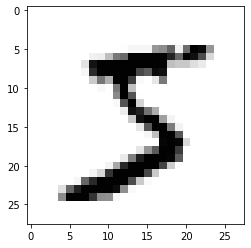

In [3]:
# 불러온 이미지 중 하나만 가져오기
# 모든 이미지가 x_train에 저장되어 있음 
# cmap = "Greys"옵션을 지정해 흑백으로 출력되게 함
import matplotlib.pyplot as plt

plt.imshow(x_train[0] , cmap = "Greys")
plt.show()

In [4]:
# 데이터 전처리
# 각 픽셀은 밝기 정도에 따라 0부터 255까지 등급을 매김 
# 따라서 이미지에 0이 아닌 부분은 전부 값이 있음(0에 가까울 수록 흰 , 255에 가까울수록 검)
# 0이 아닌 부분이 5의 형상이 되어 local이 학습을 함
import sys 
for x in x_train[0]:
    for i in x:
        sys.stdout.write("%d\t" %i) # sys.stdout.write("%3d" % i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [16]:
# 2차원 배열을 1차원 데이터로 변경
x_train = x_train.reshape(x_train.shape[0] , 784)

In [6]:
# 현재 주어진 데이터의 값은 0 - 255까지의 정수로 , 정규화를 위해
# 255로 나누어 주려면 먼저 이 값을 실수형으로 바꾸어야 함

# 바꾸기 1번 astype함수를 사용해 실수형으로 바뀐 뒤 255로 나눔
x_train = x_train.astype("float64")
x_train = x_train / 255

In [7]:
# 바꾸기 2번 위의 2줄을 한줄로 작성 
x_test = x_test.reshape(x_test.shape[0] , 784).astype("float64") / 255

In [8]:
# 실제로 이 숫자의 어떤지를 불러오고자 y_class_train[0]을 
# 다음과 같이 출력
# 클래스 값 확인
print("class : %d" % (y_class_train[0]))

class : 5


In [9]:
# 바이너리화
y_train = tf.keras.utils.to_categorical(y_class_train , 10)
y_test = tf.keras.utils.to_categorical(y_class_test , 10)

In [10]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
import numpy as np
import pandas as pa
import sys

seed = 0 
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(30 , input_dim = 784 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(10 , activation = "softmax"))
model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

modelpath = "./model/{epoch:02f}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 ,save_best_only = True)
early = EarlyStopping(monitor = "val_loss" , patience = 10)
history = model.fit(x_train , y_train , batch_size = 300 , epochs = 30 , verbose = 1 , validation_data = (x_test , y_test) , callbacks = [checkpoint , early])
print("\nAccuracy :{:.4f}".format(model.evaluate(x_test , y_test)[1]))

Epoch 1/30
200/200 [==============================] - 1s 7ms/step - loss: 0.7212 - accuracy: 0.7879 - val_loss: 0.3078 - val_accuracy: 0.9114

Epoch 00001: val_loss improved from inf to 0.30778, saving model to ./model/1.000000-0.3078.hdf5
Epoch 2/30
200/200 [==============================] - 1s 6ms/step - loss: 0.2813 - accuracy: 0.9193 - val_loss: 0.2458 - val_accuracy: 0.9273

Epoch 00002: val_loss improved from 0.30778 to 0.24578, saving model to ./model/2.000000-0.2458.hdf5
Epoch 3/30
200/200 [==============================] - 1s 6ms/step - loss: 0.2304 - accuracy: 0.9324 - val_loss: 0.2067 - val_accuracy: 0.9384

Epoch 00003: val_loss improved from 0.24578 to 0.20674, saving model to ./model/3.000000-0.2067.hdf5
Epoch 4/30
200/200 [==============================] - 1s 6ms/step - loss: 0.1984 - accuracy: 0.9427 - val_loss: 0.1826 - val_accuracy: 0.9466

Epoch 00004: val_loss improved from 0.20674 to 0.18261, saving model to ./model/4.000000-0.1826.hdf5
Epoch 5/30
200/200 [========

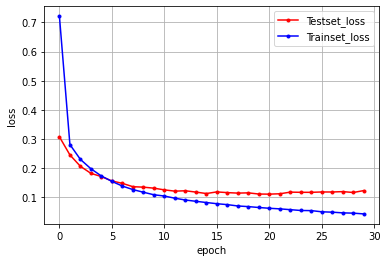

In [19]:
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len , y_vloss , marker = "." , c = "red" , label = "Testset_loss")
plt.plot(x_len , y_loss , marker = "." , c = "blue" , label = "Trainset_loss")

plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()